# SHO Fitting Data

## Import Packages

In [1]:
import sys
sys.path.append('../../')
sys.path.append('/home/ferroelectric/m3_learning/m3_learning/src')

In [2]:
# For the notebook to work you must have m3_learning installed
# pip install m3_learning

%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset

# from m3_learning.be.dataset import BE_Dataset
printing = printer(basepath = './../../../Figures/rapid_fitting/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

2023-04-25 15:37:19.997887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 15:37:20.114291: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-25 15:37:20.534421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/cv2/../../lib64:
2023-04-25 15:37:20.534472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loading data for SHO fitting


In [3]:
# Download the data file from Zenodo
url = 'https://zenodo.org/record/7774788/files/PZT_2080_raw_data.h5?download=1'

# Specify the filename and the path to save the file
filename = 'data_raw.h5'
save_path = './../../../Data/2023_rapid_fitting'

# download the file
download_and_unzip(filename, url, save_path)

Using files already downloaded


In [4]:
data_path = save_path + '/' + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins = 80)

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data_Reshaped
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
    ├ raw_data_resampled
├ Raw_Data-SHO_Fit_000
  --------------------
  ├ Fit
  ├ Guess
  ├ SHO_LSQF
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
  ├ comp

## Visualize Raw Data

### Raw Cantilever Response


True 


                  Resample = False
                  Raw Format = complex
                  fitter = LSQF
                  scaled = False
                  Output Shape = pixels
                  Measurement State = all
                  Resample Resampled = False
                  Resample Bins = 80
                  LSQF Phase Shift = None
                  NN Phase Shift = None
                  
./../../../Figures/rapid_fitting/Figure_1_raw_cantilever_response.png
./../../../Figures/rapid_fitting/Figure_1_raw_cantilever_response.svg


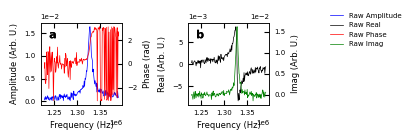

In [5]:
BE_viz = Viz(dataset, printing, verbose=True)
prediction = {"resampled": False,
              "label": "Raw"}

BE_viz.raw_data_comparison(prediction, filename="Figure_1_raw_cantilever_response")


**Figure 1.** Raw cantilever response. a) Magnitude spectrum and Phase, b) real and imaginary parts of the complex spectrum.


### Band-Excitation Experiments

/home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


./../../../Figures/rapid_fitting/Figure_2_raw_be_experiment.png
./../../../Figures/rapid_fitting/Figure_2_raw_be_experiment.svg


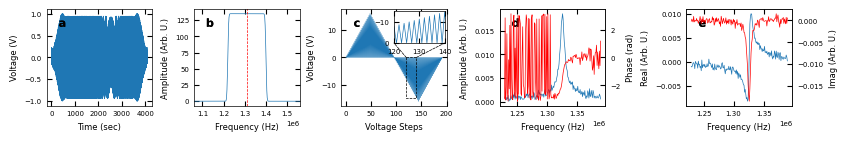

In [6]:
BE_viz.raw_be(dataset, filename="Figure_2_raw_be_experiment")

**Figure 2.** Band-Excitation Experiments. a) Raw drive amplitude applied to the tip, b) Energy of the waveform in the frequency domain, c) DC voltage applied to switch the sample, inset shows a zoomed in view of the switching waveform where measurements are made in the on and off state. d) raw cantilever response magnitude and phase, e) real and imaginary parts of the complex spectrum.

## SHO Fitting
**Note**: this code takes around 15 minutes to execute

In [7]:
Fit_SHO = False

if Fit_SHO: 

    # # computes the SHO fit for the data in the file
    dataset.SHO_Fitter(force = True)

In [8]:
# instantiate the dataset object
# it is a good idea to do this again in case the original data did not have complete SHO Fits
dataset = BE_Dataset(data_path, resample_bins = 80)
BE_viz = Viz(dataset, printing, verbose=True)

### Views the Distribution of the Least Squares Fitting (LSQF) results

It is good to view the distributions and standardize the phase shift. The phase shift is rotated around the unit circle such that the peaks are at $-\pi/2$ and $\pi/2$


                  Resample = False
                  Raw Format = complex
                  fitter = LSQF
                  scaled = False
                  Output Shape = pixels
                  Measurement State = all
                  Resample Resampled = False
                  Resample Bins = 80
                  LSQF Phase Shift = 0
                  NN Phase Shift = None
                  
./../../../Figures/rapid_fitting/Figure_3_Original_LSQF_Histograms.png
./../../../Figures/rapid_fitting/Figure_3_Original_LSQF_Histograms.svg


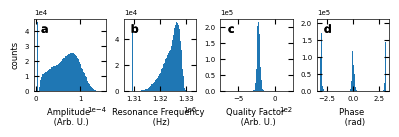

In [9]:
dataset.LSQF_phase_shift = 0

BE_viz.SHO_hist(dataset.SHO_fit_results(),
                      filename="Figure_3_Original_LSQF_Histograms")


**Figure 3.** Distribution of the Least Squares Fitting (LSQF) results of the unmodified data. a) Distribution of the amplitude, b) Distribution of the resonance frequency, c) Distribution of the quality factor, d) Distribution of the resonance frequency.


                  Resample = False
                  Raw Format = complex
                  fitter = LSQF
                  scaled = False
                  Output Shape = pixels
                  Measurement State = all
                  Resample Resampled = False
                  Resample Bins = 80
                  LSQF Phase Shift = 1.5707963267948966
                  NN Phase Shift = None
                  
./../../../Figures/rapid_fitting/Figure_4_Phase_Shifted_LSQF_Histograms.png
./../../../Figures/rapid_fitting/Figure_4_Phase_Shifted_LSQF_Histograms.svg


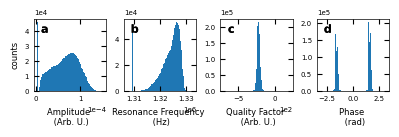

In [10]:
dataset.LSQF_phase_shift = np.pi/2

BE_viz.SHO_hist(dataset.SHO_fit_results(),
                      filename="Figure_4_Phase_Shifted_LSQF_Histograms")

**Figure 4.** Distribution of the Least Squares Fitting (LSQF) results of the unmodified data. a) Distribution of the amplitude, b) Distribution of the resonance frequency, c) Distribution of the quality factor, d) Distribution of the resonance frequency.

### Plots the SHO Fit Results


                  Resample = False
                  Raw Format = complex
                  fitter = LSQF
                  scaled = False
                  Output Shape = pixels
                  Measurement State = on
                  Resample Resampled = False
                  Resample Bins = 80
                  LSQF Phase Shift = 1.5707963267948966
                  NN Phase Shift = None
                  
./../../../Figures/rapid_fitting/Figure_5_Single_Pixel_Loops.png
./../../../Figures/rapid_fitting/Figure_5_Single_Pixel_Loops.svg


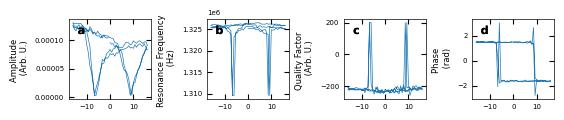

In [11]:
dataset.measurement_state ='on'

BE_viz.SHO_loops(filename="Figure_5_Single_Pixel_Loops")


## Preprocessing

### Resampling

The neural network requires that we resample the data. We will resample the data to 80 points. 

#### Validating the resampled data

True 


                  Resample = False
                  Raw Format = complex
                  fitter = LSQF
                  scaled = False
                  Output Shape = pixels
                  Measurement State = on
                  Resample Resampled = False
                  Resample Bins = 80
                  LSQF Phase Shift = 1.5707963267948966
                  NN Phase Shift = None
                  
predicted 


                  Resample = True
                  Raw Format = complex
                  fitter = LSQF
                  scaled = False
                  Output Shape = pixels
                  Measurement State = on
                  Resample Resampled = True
                  Resample Bins = 80
                  LSQF Phase Shift = 1.5707963267948966
                  NN Phase Shift = None
                  
./../../../Figures/rapid_fitting/Figure_6_raw_cantilever_response_resampled.png
./../../../Figures/rapid_fitting/Figure_6_raw_cantilever_response_r

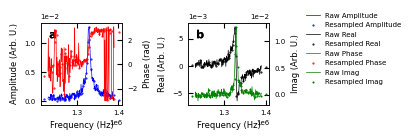

In [12]:
BE_viz = Viz(dataset, printing, verbose=True)
raw = {"resampled": False,
              "label": "Raw"}

prediction = {"resampled": True,
              "label": "Resampled"}

BE_viz.raw_data_comparison(raw, prediction, filename="Figure_6_raw_cantilever_response_resampled")